In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Análise exploratória dos dados

Visão geral dos dados

In [48]:
dataset = pd.read_csv('/content/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
dataset.shape

(303, 14)

Observando a existência de dados faltantes

In [50]:
dataset.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Observando a existência de outliers

<Axes: ylabel='trestbps'>

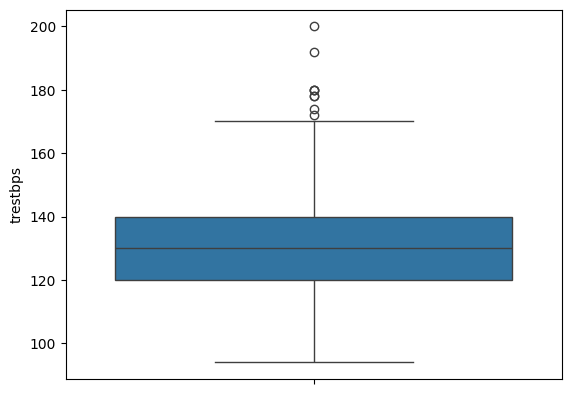

In [51]:
#bloxplot para averiguar a existência de outliers
sns.boxplot(data=dataset, y=dataset['trestbps'])

<Axes: ylabel='chol'>

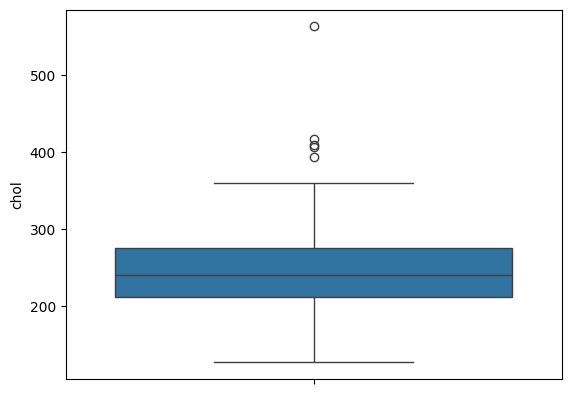

In [52]:
#bloxplot para averiguar a existência de outliers
sns.boxplot(data=dataset, y=dataset['chol'])

<Axes: ylabel='thalach'>

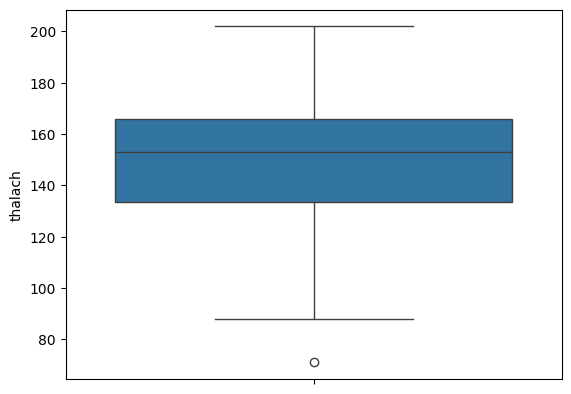

In [53]:
#bloxplot para averiguar a existência de outliers
sns.boxplot(data=dataset, y=dataset['thalach'])

<Axes: ylabel='oldpeak'>

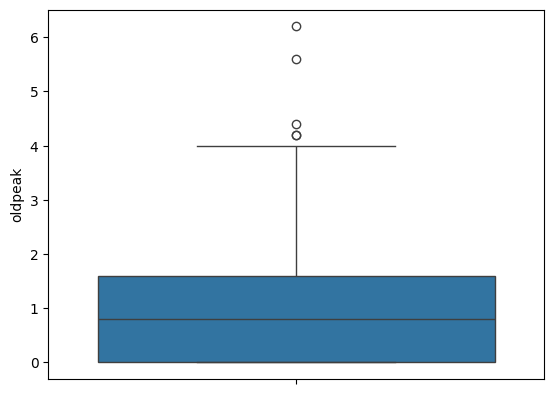

In [54]:
#bloxplot para averiguar a existência de outliers
sns.boxplot(data=dataset, y=dataset['oldpeak'])

# Retirando outliers

In [55]:
def filtro_outlier(nome_coluna):
    Q1 = dataset[nome_coluna].quantile(.25) # quantile Q1
    Q3 = dataset[nome_coluna].quantile(.75) # quantile Q3
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5*IQR
    limite_superior = Q3 + 1.5*IQR

    return (dataset[nome_coluna] < limite_inferior) | (dataset[nome_coluna] > limite_superior)


In [56]:
# filtro da coluna chol
filtro_chol = filtro_outlier('chol')
dataset[filtro_chol]['chol']

,chol
28,417
85,564
96,394
220,407
246,409


In [57]:
# retirando o outliers de chol
dataset = dataset[~filtro_chol]

In [58]:
# filtro da coluna trestbps
filtro_trestbps = filtro_outlier('trestbps')
dataset[filtro_trestbps]['trestbps']

,trestbps
8,172
101,178
110,180
203,180
223,200
241,174
248,192
260,178
266,180


In [59]:
dataset = dataset[~filtro_trestbps]

In [60]:
# retirando oultiers de oldpeak
filtro_oldpeak = filtro_outlier('oldpeak')
dataset[filtro_oldpeak]['oldpeak']

,oldpeak
204,6.2
221,5.6
250,4.2
291,4.4


In [61]:
dataset = dataset[~filtro_oldpeak]

In [62]:
# retirando oultiers de thalach
filtro_thalac = filtro_outlier('thalach')
dataset[filtro_thalac]['thalach']

,thalach
272,71


In [63]:
dataset = dataset[~filtro_thalac]

# Verificando se os outliers foram realmente retirados

<Axes: ylabel='chol'>

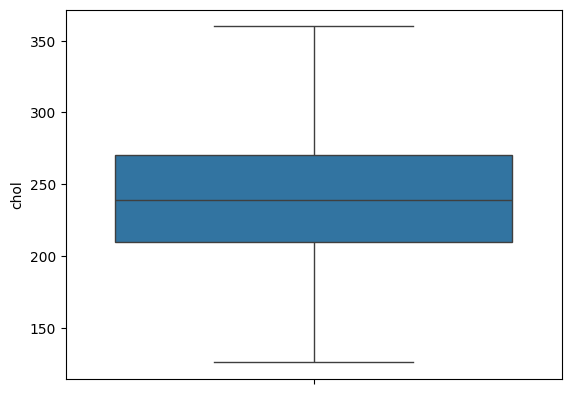

In [64]:
sns.boxplot(data=dataset, y=dataset['chol'])

<Axes: ylabel='trestbps'>

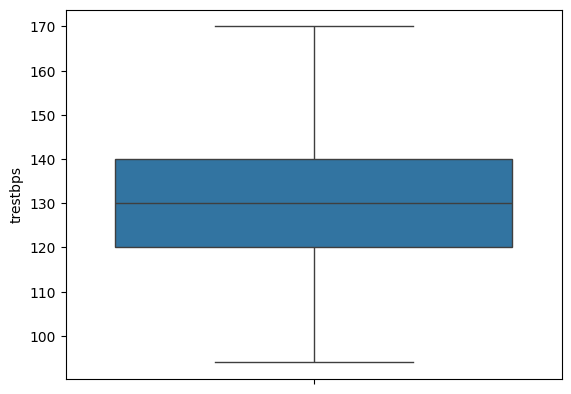

In [65]:
sns.boxplot(data=dataset, y=dataset['trestbps'])

<Axes: ylabel='oldpeak'>

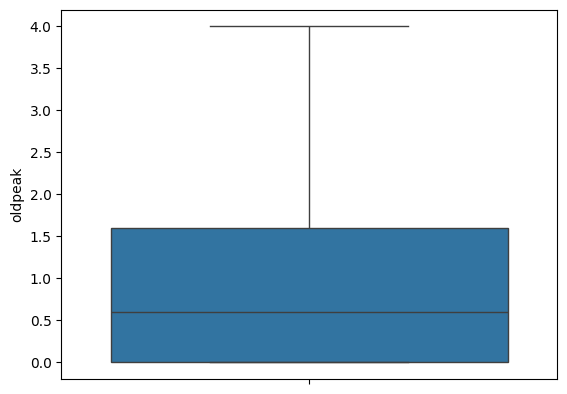

In [66]:
sns.boxplot(data=dataset, y=dataset['oldpeak'])

<Axes: ylabel='thalach'>

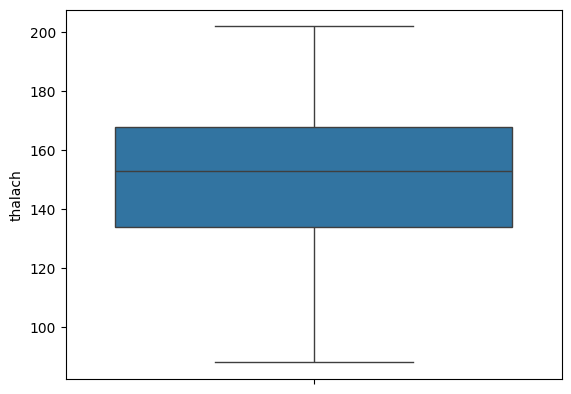

In [67]:
sns.boxplot(data=dataset, y=dataset['thalach'])

In [68]:
dataset.reset_index(drop=True, inplace=True)

# Inciando a análise da relação entre as variáveis

Relação entre o tipo de dor no peito com a idade da amostra presente no dataset

<Axes: title={'center': 'Relação entre problemas cardíacos e a idade das pessoas'}, xlabel='age', ylabel='target'>

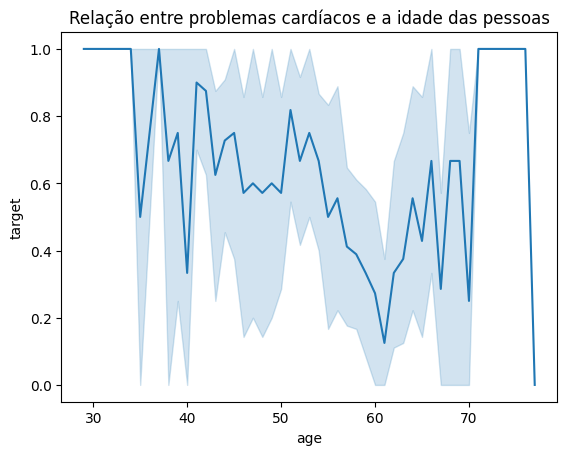

In [70]:
plt.title('Relação entre problemas cardíacos e a idade das pessoas')
sns.lineplot(x='age', y='target', data=dataset)

<Axes: title={'center': 'Relação entre problemas cardíacos e o gênero do indíviduo'}, xlabel='sex', ylabel='target'>

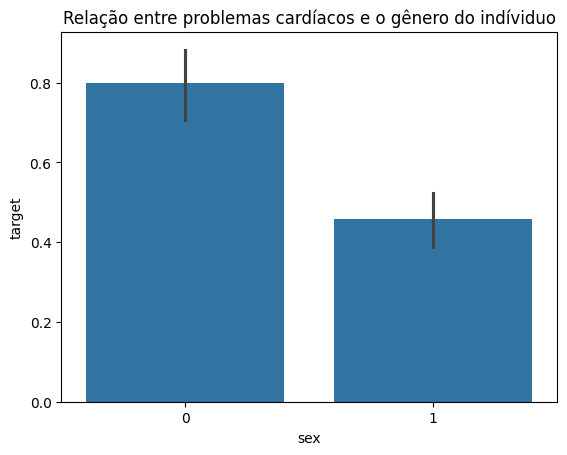

In [71]:
plt.title('Relação entre problemas cardíacos e o gênero do indíviduo')
sns.barplot(x='sex', y='target', data=dataset)
# 0 -> masculino
# 1 -> feminino

Relação entre a idade e a pressão sanguínea

<Axes: title={'center': 'Relação entre os alvos com problemas cardíacos e o colesterol'}, xlabel='target', ylabel='chol'>

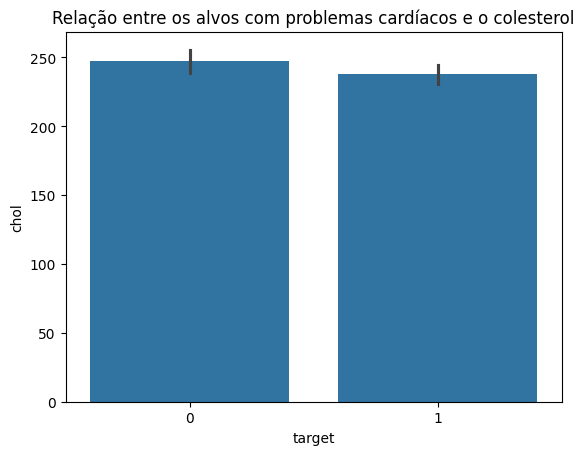

In [72]:
plt.title('Relação entre os alvos com problemas cardíacos e o colesterol')
sns.barplot(x='target', y='chol', data=dataset)

<Axes: title={'center': 'Relação entre os indíviduos com problemas cardíacos e estresse'}, xlabel='target', ylabel='thalach'>

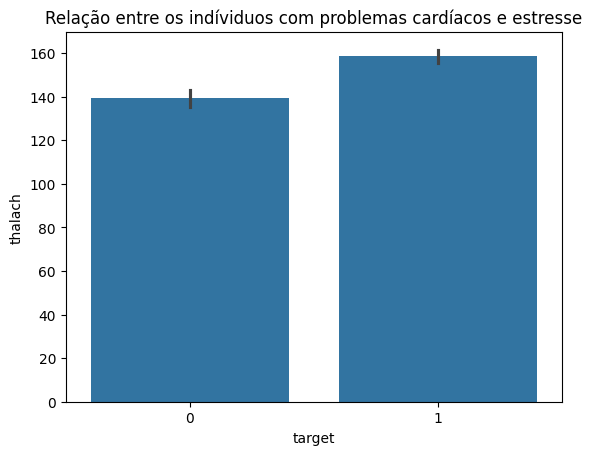

In [73]:
plt.title('Relação entre os indíviduos com problemas cardíacos e estresse')
sns.barplot(x='target', y='thalach', data=dataset)

# Escalonamento dos atributos da variável X

In [87]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = dataset.loc[:, :'thal'] #vou selecionar as colunas age, sex, co, trestpbs, chol, fbs, retceb, thalach, exang, oldpeak, slope, ca e thal para fazerem parte do X
X_heart = scaler_x.fit_transform(X)

# Regressão logística

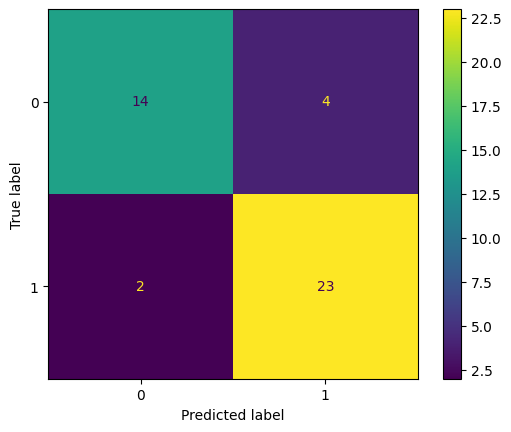

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.85      0.92      0.88        25

    accuracy                           0.86        43
   macro avg       0.86      0.85      0.85        43
weighted avg       0.86      0.86      0.86        43



In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

Y = dataset['target']

X_train, X_test, Y_train, Y_test = train_test_split(X_heart, Y, test_size=0.15, random_state=42)


regresao_logistica = LogisticRegression(C=0.1,random_state=42).fit(X_train, Y_train)

y_pred = regresao_logistica.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(regresao_logistica, X_test, Y_test)
plt.show()

print(classification_report(Y_test, y_pred))

# Máquina de Vetores de Suporte - SVM

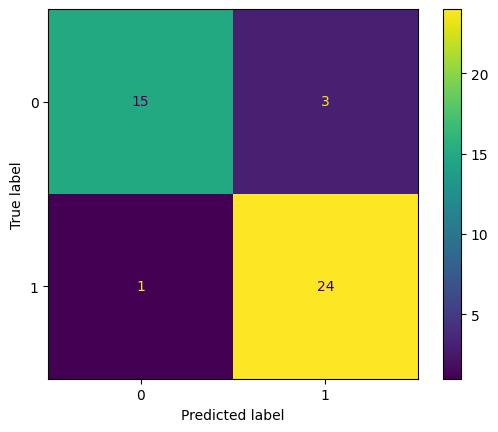

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.89      0.96      0.92        25

    accuracy                           0.91        43
   macro avg       0.91      0.90      0.90        43
weighted avg       0.91      0.91      0.91        43



In [78]:
from sklearn import svm


maquina_vetores_suporte = svm.SVC(kernel='linear', C=1, random_state=42)
maquina_vetores_suporte.fit(X_train, Y_train)

y_pred = maquina_vetores_suporte.predict(X_test)


accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(maquina_vetores_suporte, X_test, Y_test)
plt.show()
print(classification_report(Y_test, y_pred))

# Redes neurais artificiais

In [79]:
print(f'Quantidade de neuronios na primeira camada oculta : {(2 * 10) + 1}\n')
print(f'Quantidade de neuronios na segunda camada oculta : {((2 * 10) + 1) / 2}\n')

Quantidade de neuronios na primeira camada oculta : 21

Quantidade de neuronios na segunda camada oculta : 10.5



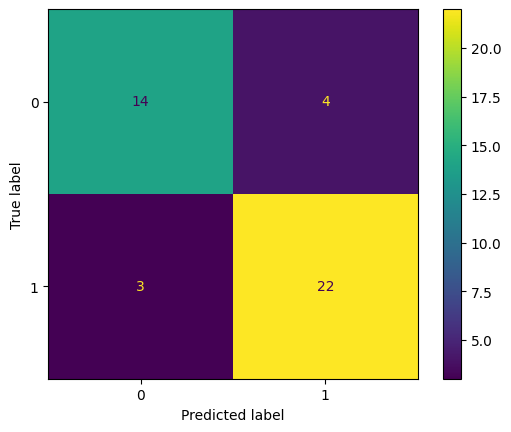

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.85      0.88      0.86        25

    accuracy                           0.84        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.84      0.84      0.84        43



In [80]:
from sklearn.neural_network import MLPClassifier


rede_neural = MLPClassifier(max_iter=2000, tol=0.000010,
                            solver='adam', activation='relu', hidden_layer_sizes=(21,11), random_state=42)

rede_neural.fit(X_train, Y_train)

y_pred = rede_neural.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(rede_neural, X_test, Y_test)
plt.show()
print(classification_report(Y_test, y_pred))

# Árvore de decisão

[Text(0.46125, 0.95, 'co <= -0.475\nentropy = 0.991\nsamples = 241\nvalue = [107, 134]'),
 Text(0.28, 0.85, 'ca <= -0.207\nentropy = 0.875\nsamples = 112\nvalue = [79, 33]'),
 Text(0.370625, 0.8999999999999999, 'True  '),
 Text(0.18, 0.75, 'thal <= 0.336\nentropy = 0.994\nsamples = 53\nvalue = [24, 29]'),
 Text(0.1, 0.65, 'age <= 0.657\nentropy = 0.592\nsamples = 28\nvalue = [4, 24]'),
 Text(0.04, 0.55, 'chol <= 1.498\nentropy = 0.276\nsamples = 21\nvalue = [1, 20]'),
 Text(0.02, 0.45, 'entropy = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.06, 0.45, 'thalach <= -0.267\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.04, 0.35, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08, 0.35, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16, 0.55, 'age <= 1.149\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]'),
 Text(0.14, 0.45, 'thalach <= 0.373\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.12, 0.35, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.16, 0.3

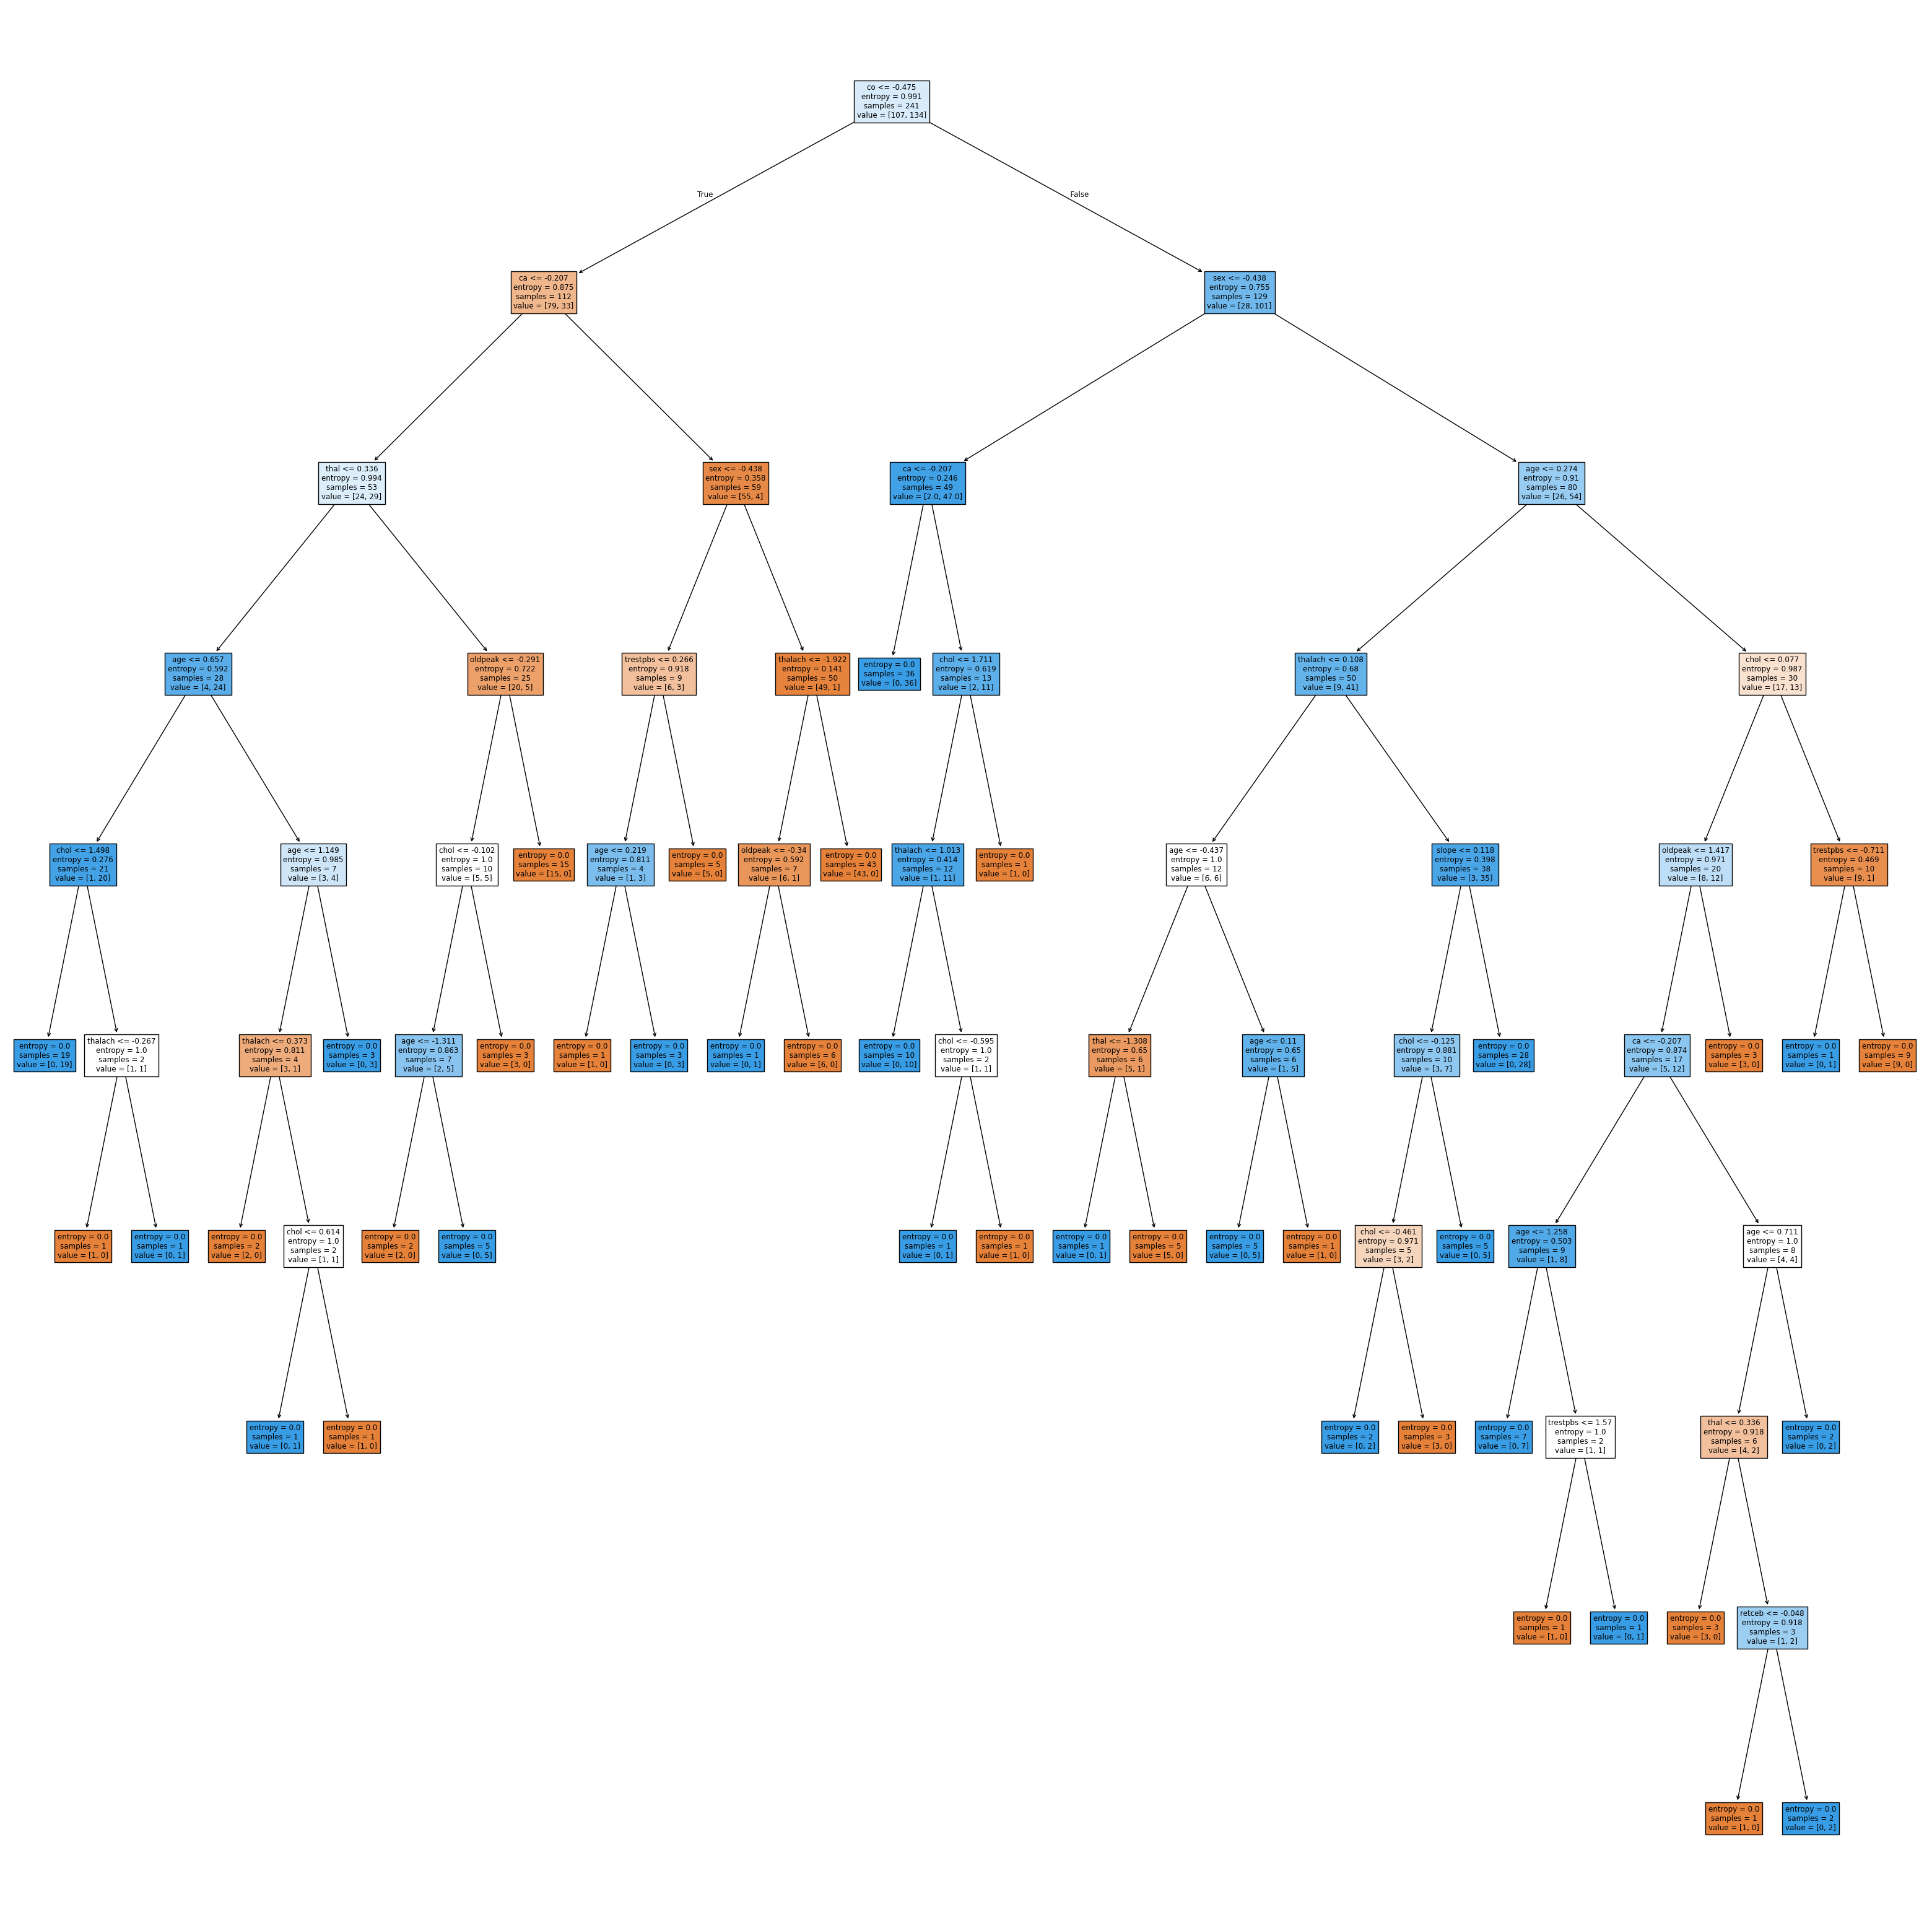

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

arvore = DecisionTreeClassifier(criterion='entropy', random_state=42)
arvore.fit(X_train, Y_train)

indices_arvore = ['age', 'sex', 'co', 'trestpbs', 'chol', 'fbs', 'retceb', 'thalach', 'exang', 'oldpeak', 'slope', 'ca' , 'thal']
plt.subplots(nrows=1, ncols=1, figsize=(40,40))
tree.plot_tree(arvore, feature_names=indices_arvore, filled=True)

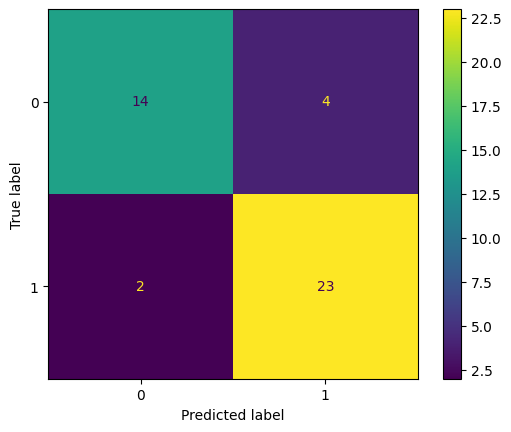

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.85      0.92      0.88        25

    accuracy                           0.86        43
   macro avg       0.86      0.85      0.85        43
weighted avg       0.86      0.86      0.86        43



In [84]:
y_pred = arvore.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(arvore, X_test, Y_test)
plt.show()
print(classification_report(Y_test, y_pred))

# Random Forest

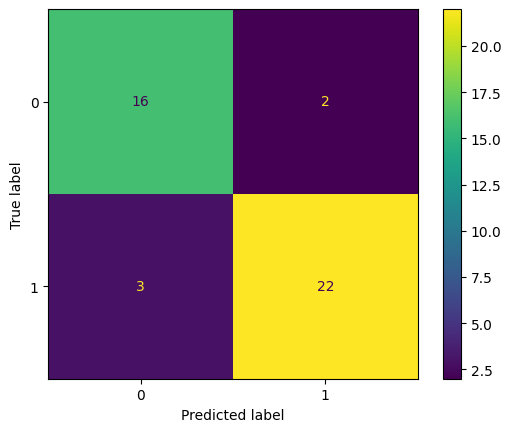

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.92      0.88      0.90        25

    accuracy                           0.88        43
   macro avg       0.88      0.88      0.88        43
weighted avg       0.89      0.88      0.88        43



In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


floresta = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
floresta.fit(X_train, Y_train)

y_pred = floresta.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(floresta, X_test, Y_test)
plt.show()
print(classification_report(Y_test, y_pred))